In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
comments=pd.read_csv("C:/Users/Rakesh/Downloads/Youtube_project_shan_singh/USComments.csv",error_bad_lines=False)

C:\Users\Rakesh\AppData\Local\Temp\ipykernel_9976\3787758092.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  comments=pd.read_csv("C:/Users/Rakesh/Downloads/Youtube_project_shan_singh/USComments.csv",error_bad_lines=False)
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\Rakesh\AppData\Local\Temp\ipykernel_9976\3787758092.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments=pd.read_csv("C:/Users/Rakesh/Downloads/Youtube_project_shan_singh/USComments.csv",error_bad_lines=False)


In [3]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [4]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691400 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691400 non-null  object
 1   comment_text  691375 non-null  object
 2   likes         691400 non-null  object
 3   replies       691400 non-null  object
dtypes: object(4)
memory usage: 21.1+ MB


In [5]:
comments.describe()

,video_id,comment_text,likes,replies
count,691400,691375,691400,691400
unique,2266,434076,1284,479
top,XpVt6Z1Gjjo,Lol,0,0
freq,800,310,456894,525730


In [6]:
comments.shape

(691400, 4)

In [7]:
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [8]:
comments.dropna(inplace=True)

In [9]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [10]:
!pip install textblob

In [11]:
from textblob import TextBlob

In [12]:
TextBlob('trending 😉').sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [13]:
polarity=[]
for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)
        

In [14]:
polarity[0:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, -0.13571428571428573]

In [15]:
comments['Polarity']=polarity

In [16]:
comments.head(14)

,video_id,comment_text,likes,replies,Polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


In [17]:
comments_positive=comments[comments['Polarity']==1]

In [18]:
comments_negative=comments[comments['Polarity']==-1]

In [19]:
comments_positive.head()

,video_id,comment_text,likes,replies,Polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [20]:
!pip install wordcloud

In [21]:
from wordcloud import WordCloud, STOPWORDS

In [22]:
total_comments=''.join(comments_negative['comment_text'])

(-0.5, 399.5, 199.5, -0.5)

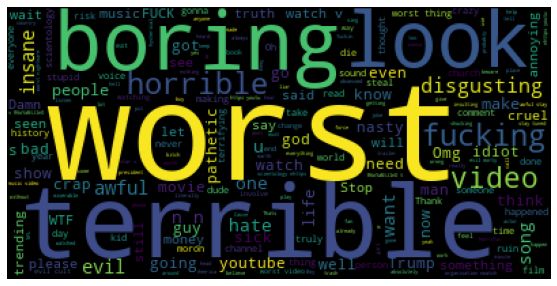

In [23]:
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [24]:
total_comments2=''.join(comments_positive['comment_text'])

(-0.5, 399.5, 199.5, -0.5)

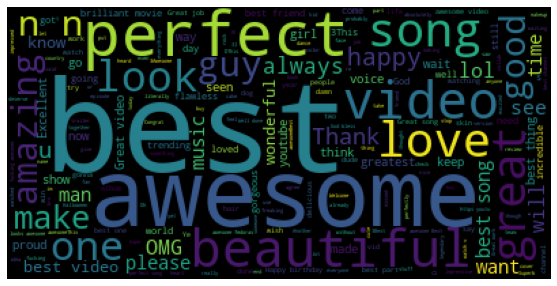

In [25]:
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments2)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [26]:
!pip install emoji

In [27]:
import emoji

In [28]:
comments.head(14)

,video_id,comment_text,likes,replies,Polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


In [29]:
comment='trending 😉'

In [30]:
comment

'trending 😉'

In [31]:
[c for c in comment if c in emoji.UNICODE_EMOJI_ENGLISH]

['😉']

In [32]:
!pip install emoji==1.2.0

In [45]:
emoji_list=[]
 
for comment in comments['comment_text']:
    for char in comment:
        if char in emoji.UNICODE_EMOJI_ENGLISH:
            emoji_list.append(char)

In [46]:
len(emoji_list)

294549

In [47]:
from collections import Counter

In [48]:
Counter(emoji_list).most_common(10)[0][0]

'😂'

In [49]:
Counter(emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [50]:
Counter(emoji_list).most_common(10)[1][0]

'😍'

In [51]:
emojis=[Counter(emoji_list).most_common(10)[i][0] for i in range(10)]

In [52]:
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [53]:
freqs=[Counter(emoji_list).most_common(10)[i][1] for i in range(10)]

In [54]:
freqs

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [55]:
!pip install plotly

In [57]:
import plotly.graph_objs as go

In [58]:
from plotly.offline import iplot

In [61]:
trace=go.Bar(x=emojis,y=freqs)

In [65]:
print("These are some of the frequently used emojis on our Youtube Platform")
iplot([trace])

These are some of the frequently used emojis on our Youtube Platform


In [66]:
import os

In [68]:
path = "C:/Users/Rakesh/Downloads/Youtube_project_shan_singh/additional_data"

In [70]:
files=os.listdir(path)

In [71]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [73]:
for i in range(1,len(files),2):
    print(i)

1
3
5
7
9
11
13
15
17
19


In [80]:
files_csv=[files[i]for i in range(0,len(files),2)]

In [81]:
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [83]:
files_csv[0].split('.')[0][0:2]

'CA'

In [84]:
full_df=pd.DataFrame()
for file in files_csv:
    current_df=pd.read_csv(path+'/'+file, encoding='iso-8859-1', error_bad_lines=False)
    current_df['country']=file.split('.')[0][0:2]
    full_df=pd.concat([full_df,current_df])
    

C:\Users\Rakesh\AppData\Local\Temp\ipykernel_9976\2293807264.py:3: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\Rakesh\AppData\Local\Temp\ipykernel_9976\2293807264.py:3: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\Rakesh\AppData\Local\Temp\ipykernel_9976\2293807264.py:3: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\Rakesh\AppData\Local\Temp\ipykernel_9976\2293807264.py:3: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\Rakesh\AppData\Local\Temp\ipykernel_9976\2293807264.py:3: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future vers

In [85]:
full_df.head(4)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA


In [86]:
full_df.shape

(375942, 17)

# Analysing the Most Liked Category 

In [88]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [94]:
cat=pd.read_csv('C:/Users/Rakesh/Downloads/Youtube_project_shan_singh/category_file.txt', sep=':')

In [95]:
cat

,Category_id Category_name
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports
18,Short Movies
19,Travel & Events
20,Gaming
21,Videoblogging
22,People & Blogs


In [97]:
cat.reset_index(inplace=True)

In [98]:
cat

,index,Category_id Category_name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [99]:
cat.columns=['category_id','category_name']

In [100]:
cat

,category_id,category_name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [101]:
cat.set_index('category_id',inplace=True)

In [102]:
cat

,category_name
category_id,
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports
18,Short Movies
19,Travel & Events
20,Gaming
21,Videoblogging


In [104]:
dct=cat.to_dict()

In [105]:
dct['category_name']

{1: ' Film & Animation',
 2: ' Autos & Vehicles',
 10: ' Music',
 15: ' Pets & Animals',
 17: ' Sports',
 18: ' Short Movies',
 19: ' Travel & Events',
 20: ' Gaming',
 21: ' Videoblogging',
 22: ' People & Blogs',
 23: ' Comedy',
 24: ' Entertainment',
 25: ' News & Politics',
 26: ' Howto & Style',
 27: ' Education',
 28: ' Science & Technology',
 29: ' Nonprofits & Activism',
 30: ' Movies',
 31: ' Anime/Animation',
 32: ' Action/Adventure',
 33: ' Classics',
 34: ' Comedy',
 35: ' Documentary',
 36: ' Drama',
 37: ' Family',
 38: ' Foreign',
 39: ' Horror',
 40: ' Sci-Fi/Fantasy',
 41: ' Thriller',
 42: ' Shorts',
 43: ' Shows',
 44: ' Trailers            '}

In [109]:
full_df['category_name']=full_df['category_id'].map(dct['category_name'])

In [110]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category_Name',
       'category_name'],
      dtype='object')

In [111]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_Name,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,Entertainment,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,Music,Music


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

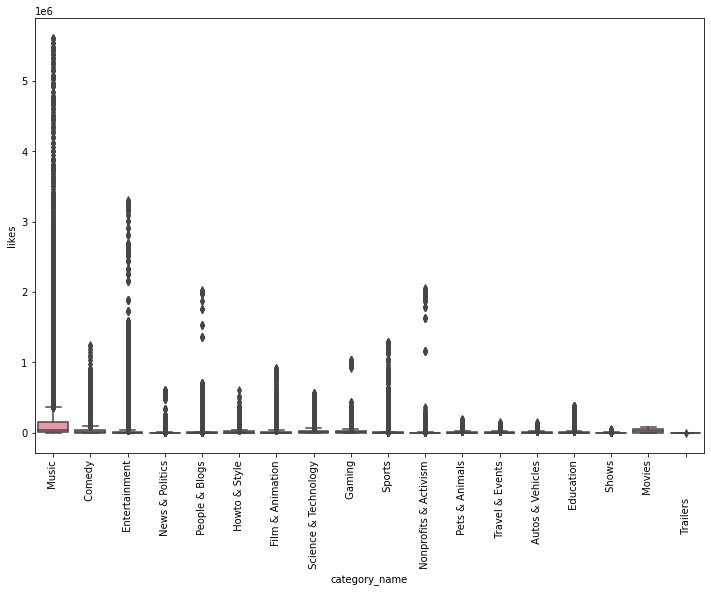

In [113]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name', y='likes', data=full_df)
plt.xticks(rotation='vertical')

# Analysing whether audience is engaged or not

In [114]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category_Name',
       'category_name'],
      dtype='object')

In [115]:
full_df['like_rate']=(full_df['likes']/full_df['views'])*100
full_df['dislike_rate']=(full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate']=(full_df['comment_count']/full_df['views'])*100

In [116]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_Name,category_name,like_rate,dislike_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music,Music,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy,Comedy,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy,Comedy,4.575843,0.167292,0.256342
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,False,False,False,I know it's been a while since we did this sho...,CA,Entertainment,Entertainment,6.309630,0.094903,0.835851
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,...,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,Music,Music,4.874563,0.062887,0.253752


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

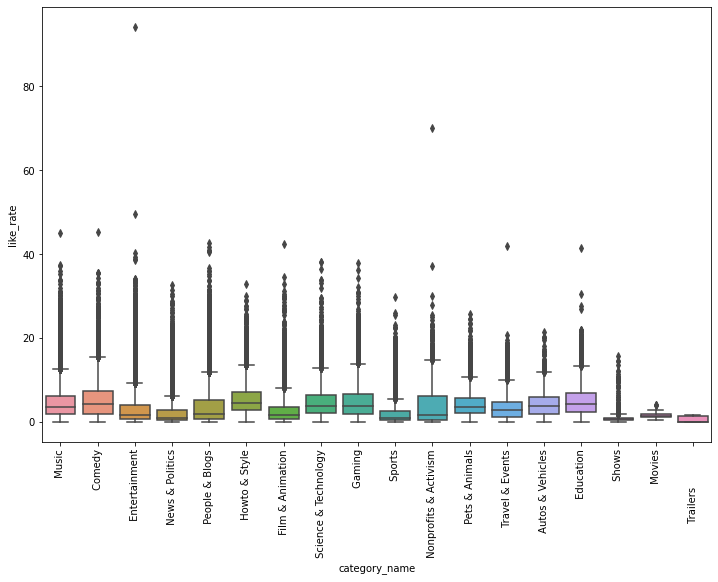

In [117]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name', y='like_rate', data=full_df)
plt.xticks(rotation='vertical')

<AxesSubplot:xlabel='views', ylabel='likes'>

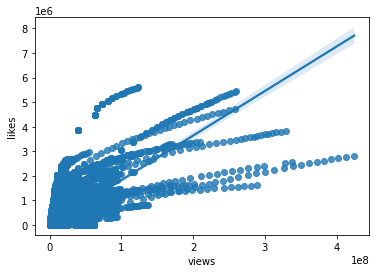

In [118]:
sns.regplot(data=full_df,x='views',y='likes')

In [119]:
full_df[['views','likes','dislikes']]

,views,likes,dislikes
0,17158579,787425,43420
1,1014651,127794,1688
2,3191434,146035,5339
3,2095828,132239,1989
4,33523622,1634130,21082
...,...,...,...
40944,1685609,38160,1385
40945,1064798,60008,382
40946,1066451,48068,1032
40947,5660813,192957,2846


In [120]:
full_df[['views','likes','dislikes']].corr()

,views,likes,dislikes
views,1.000000,0.777796,0.421653
likes,0.777796,1.000000,0.453710
dislikes,0.421653,0.453710,1.000000


<AxesSubplot:>

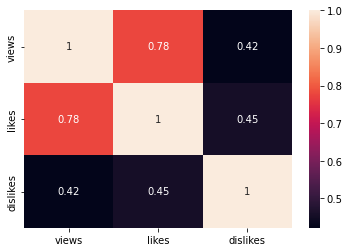

In [122]:
sns.heatmap(full_df[['views','likes','dislikes']].corr(),annot=True)

# Analyzing which channel has the largest number of trending videos

In [124]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_Name,category_name,like_rate,dislike_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music,Music,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy,Comedy,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy,Comedy,4.575843,0.167292,0.256342
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,False,False,False,I know it's been a while since we did this sho...,CA,Entertainment,Entertainment,6.309630,0.094903,0.835851
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,...,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,Music,Music,4.874563,0.062887,0.253752


In [125]:
full_df.groupby('channel_title')['video_id'].count()

channel_title
! ì¸ìì ë¬´ì¨ì¼ì´                   7
!!8æã ãé¢ç½ãã¿å¤§éå          1
!BTSã»TWICE ã¾ã¨ã                     1
!Los amorosos ViralesÂ¡                    2
!t Live                                    4
                                          ..
ï¼åã§ã§ãã DIY                     8
ï¼¢ï¼¡ï¼³ï¼¨ï½ï½                         2
ï¼«ã®ãã£ãã·ã³ã°ã¡ããã­ã    1
ï¼·ï¼¡ï¼ªï¼¯ï¼©ï¼«ï¼¡                      2
ðSandrea                                2
Name: video_id, Length: 37824, dtype: int64

In [126]:
full_df.groupby('channel_title')['video_id'].count().sort_values(ascending=False)

channel_title
The Late Show with Stephen Colbert    984
WWE                                   804
Late Night with Seth Meyers           773
VikatanTV                             763
TheEllenShow                          743
                                     ... 
LIGHTS - 001 jrny                       1
bangtanist                              1
LIGAMX Femenil                          1
LIGA COLOMBIANA OFICIAL                 1
Pavel Sidorik TV                        1
Name: video_id, Length: 37824, dtype: int64

In [127]:
full_df.groupby('channel_title')['video_id'].count().sort_values(ascending=False).to_frame()

,video_id
channel_title,
The Late Show with Stephen Colbert,984
WWE,804
Late Night with Seth Meyers,773
VikatanTV,763
TheEllenShow,743
...,...
LIGHTS - 001 jrny,1
bangtanist,1
LIGAMX Femenil,1


In [128]:
full_df.groupby('channel_title')['video_id'].count().sort_values(ascending=False).to_frame().reset_index()

,channel_title,video_id
0,The Late Show with Stephen Colbert,984
1,WWE,804
2,Late Night with Seth Meyers,773
3,VikatanTV,763
4,TheEllenShow,743
...,...,...
37819,LIGHTS - 001 jrny,1
37820,bangtanist,1
37821,LIGAMX Femenil,1
37822,LIGA COLOMBIANA OFICIAL,1


In [131]:
cdf=full_df.groupby('channel_title')['video_id'].count().sort_values(ascending=False).to_frame().reset_index().rename(columns={'video_id':'total_videos'})

In [132]:
 cdf.head()

,channel_title,total_videos
0,The Late Show with Stephen Colbert,984
1,WWE,804
2,Late Night with Seth Meyers,773
3,VikatanTV,763
4,TheEllenShow,743


In [133]:
import plotly.express as px

In [134]:
px.bar(data_frame=cdf[0:20],x='channel_title',y='total_videos')